# Lending Club Loans Status Prediction - Part 2: EDA

When one borrower submits a loan application, the lender company will collected many information from him/her, and based on the information collected, they will run their algorithm and try to predict if the customer will be able to or will be willing to fully paid the loans. Then they will either approve or deny the loan application. So the prediction must be as accurate as possible, otherwise the lending companny will either loss business opportunity or loss profit.

In this study, we will use Lending Club's data from kaggle (https://www.kaggle.com/wordsforthewise/lending-club), and build a model to predict the loan's future status. 

This is the second part of the study: Exploratory Data Analysis (EDA). In this analysis we will plot the distribution of numerical columns, and then have a look on categorical columns.  

### Content:

## 1. Brief view on the data;
## 2. Principal Components Analysis (PCA);
## 3. Numerical Columns and the Target Variable;
## 4. Categorical Columns and the Target Variable;
## 5. Conclusions.

# 1. Brief view on the data

First let's import all necessary modules.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
# Read data to the data frame.
data_lc = pd.read_csv('../Data/lending_club_data.csv')

In [108]:
# Have a look on the first few rows.
data_lc.head().T

,0,1,2,3,4
loan_amnt,3600.0,24700.0,20000.0,10400.0,11950.0
term,36 months,36 months,60 months,60 months,36 months
int_rate,13.99,11.99,10.78,22.45,13.44
grade,C,C,B,F,C
emp_length,10+ years,10+ years,10+ years,3 years,4 years
home_ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT
annual_inc,55000.0,65000.0,63000.0,104433.0,34000.0
loan_status,1,1,1,1,1
purpose,debt_consolidation,small_business,home_improvement,major_purchase,debt_consolidation
dti,5.91,16.06,10.78,25.37,10.2


In [109]:
# check the column names, type, and value counts.
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188428 entries, 0 to 1188427
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   loan_amnt              1188428 non-null  float64
 1   term                   1188428 non-null  object 
 2   int_rate               1188428 non-null  float64
 3   grade                  1188428 non-null  object 
 4   emp_length             1188428 non-null  object 
 5   home_ownership         1188428 non-null  object 
 6   annual_inc             1188428 non-null  float64
 7   loan_status            1188428 non-null  int64  
 8   purpose                1188428 non-null  object 
 9   dti                    1188428 non-null  float64
 10  fico_range_high        1188428 non-null  float64
 11  inq_last_6mths         1188428 non-null  float64
 12  revol_util             1188428 non-null  float64
 13  initial_list_status    1188428 non-null  object 
 14  total_rec_late_fee

In [110]:
data_lc.describe()

,loan_amnt,int_rate,annual_inc,loan_status,dti,fico_range_high,inq_last_6mths,revol_util,total_rec_late_fee,recoveries,last_pymnt_amnt,last_fico_range_low,acc_open_past_24mths,mort_acc,num_tl_op_past_12m,percent_bc_gt_75,tot_hi_cred_lim,total_bc_limit,earliest_cr_line_year
count,1.188428e+06,1.188428e+06,1.188428e+06,1.188428e+06,1.188428e+06,1.188428e+06,1.188428e+06,1.188428e+06,1.188428e+06,1.188428e+06,1.188428e+06,1.188428e+06,1.188428e+06,1.188428e+06,1.188428e+06,1.188428e+06,1.188428e+06,1.188428e+06,1.188428e+06
mean,1.477153e+04,1.325443e+01,7.844688e+04,8.023162e-01,1.832805e+01,6.993492e+02,6.477893e-01,5.205490e+01,1.616093e+00,2.498818e+02,5.671083e+03,6.598777e+02,4.729327e+00,1.665510e+00,2.188757e+00,4.526069e+01,1.775748e+05,2.206999e+04,1.999067e+03
std,8.771198e+03,4.799188e+00,7.166356e+04,3.982525e-01,8.966710e+00,3.127449e+01,9.331700e-01,2.424539e+01,1.105017e+01,9.745093e+02,7.268222e+03,1.330101e+02,3.197330e+00,1.993872e+00,1.848692e+00,3.592331e+01,1.768581e+05,2.156825e+04,7.344918e+00
min,1.000000e+03,5.310000e+00,6.000000e+02,0.000000e+00,-1.000000e+00,6.640000e+02,0.000000e+00,0.000000e+00,-5.100000e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+02,1.000000e+02,1.934000e+03
25%,8.000000e+03,9.750000e+00,4.800000e+04,1.000000e+00,1.194000e+01,6.740000e+02,0.000000e+00,3.390000e+01,0.000000e+00,0.000000e+00,4.300075e+02,6.250000e+02,2.000000e+00,0.000000e+00,1.000000e+00,1.110000e+01,5.125900e+04,8.000000e+03,1.995000e+03
50%,1.260000e+04,1.274000e+01,6.600000e+04,1.000000e+00,1.772000e+01,6.940000e+02,0.000000e+00,5.240000e+01,0.000000e+00,0.000000e+00,2.359555e+03,6.900000e+02,4.000000e+00,1.000000e+00,2.000000e+00,4.290000e+01,1.158435e+05,1.550000e+04,2.000000e+03
75%,2.000000e+04,1.601000e+01,9.380525e+04,1.000000e+00,2.419000e+01,7.140000e+02,1.000000e+00,7.070000e+01,0.000000e+00,0.000000e+00,8.705472e+03,7.300000e+02,6.000000e+00,3.000000e+00,3.000000e+00,7.500000e+01,2.563760e+05,2.860000e+04,2.004000e+03
max,4.000000e+04,3.099000e+01,1.099920e+07,1.000000e+00,4.942300e+02,8.500000e+02,8.000000e+00,1.930000e+02,1.188830e+03,3.985955e+04,4.219205e+04,8.450000e+02,6.400000e+01,4.700000e+01,3.000000e+01,1.000000e+02,5.915440e+06,5.715000e+05,2.015000e+03


In [111]:
column_description = pd.read_csv('../Data/Column_names.csv')

In [112]:
column_description = column_description.sort_values('Column Name', ignore_index = True)

In [113]:
pd.options.display.max_colwidth = 300
column_description.style.set_properties(**{'text-align': 'left'})

,Column Name,Description
0,acc_open_past_24mths,Number of trades opened in past 24 months.
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
3,debt_settlement_flag,"Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company."
4,disbursement_method,"The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY"
5,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
6,earliest_cr_line,The date the borrower's earliest reported credit line was opened
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8,fico_range_high,The upper boundary range the borrower’s FICO at loan origination belongs to.
9,grade,LC assigned loan grade


In [114]:
# column 'loan-status' is our target column. Let's count its values.
data_lc['loan_status'].value_counts()

1    953495
0    234933
Name: loan_status, dtype: int64

loan_status = 1 means the loan is fully paid, and loan_status = 0 means the loan is defaulted.
Next we want to check the distribution of numerical columns. We will plot histogram on them.  

In [115]:
data_lc.astype({'loan_status': 'category'}).dtypes

loan_amnt                 float64
term                       object
int_rate                  float64
grade                      object
emp_length                 object
home_ownership             object
annual_inc                float64
loan_status              category
purpose                    object
dti                       float64
fico_range_high           float64
inq_last_6mths            float64
revol_util                float64
initial_list_status        object
total_rec_late_fee        float64
recoveries                float64
last_pymnt_amnt           float64
last_fico_range_low       float64
application_type           object
acc_open_past_24mths      float64
mort_acc                  float64
num_tl_op_past_12m        float64
percent_bc_gt_75          float64
tot_hi_cred_lim           float64
total_bc_limit            float64
disbursement_method        object
debt_settlement_flag       object
earliest_cr_line_year       int64
dtype: object

In [204]:
columns_numerical = data_lc.select_dtypes(['float','int64']).columns

In [205]:
type(columns_numerical)

pandas.core.indexes.base.Index

In [206]:
columns_numerical

Index(['loan_amnt', 'int_rate', 'annual_inc', 'loan_status', 'dti',
       'fico_range_high', 'inq_last_6mths', 'revol_util', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'last_fico_range_low',
       'acc_open_past_24mths', 'mort_acc', 'num_tl_op_past_12m',
       'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bc_limit',
       'earliest_cr_line_year'],
      dtype='object')

In [207]:
# check how many numerical columns.
columns_numerical.size

19

In [120]:
# define a function to make histogram plots.
def histplots(columns, ncol=None, figsize=(19, 20)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.4, hspace=0.3)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.hist(data_lc[col])
        ax.set(xlabel=col, ylabel='count')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

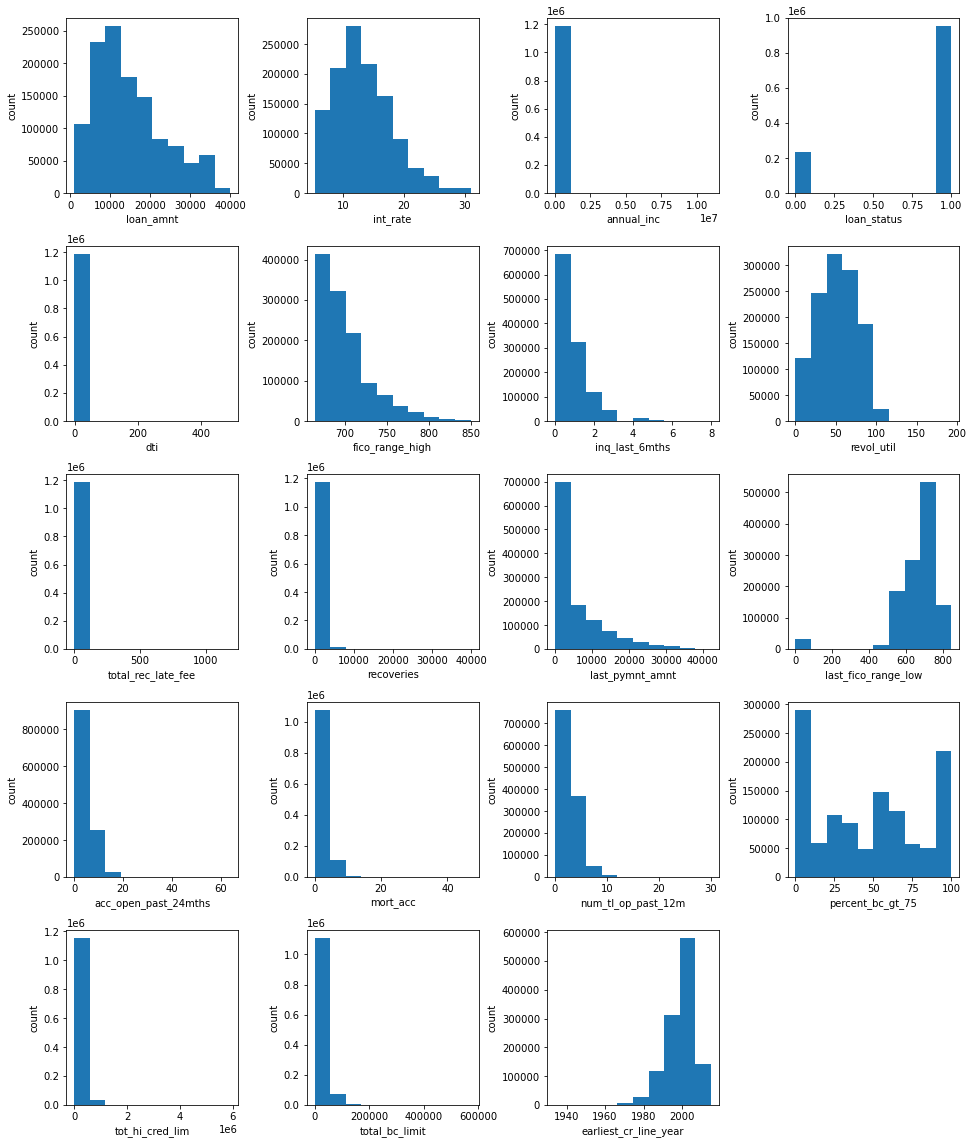

In [208]:
# run the function.
histplots(columns_numerical, ncol=4, figsize=(16,20))

In [122]:
# there are a few columns with long tail on the right side. We would like to use log y-axis to see the distribution more clearly.
columns_log = ['annual_inc', 'dti', 'total_rec_late_fee', 'recoveries', 'acc_open_past_24mths', 'mort_acc', 'tot_hi_cred_lim', 'total_bc_limit']

In [123]:
# Define the histogram plots with log y-axis
def histplots_log(columns, ncol=None, figsize=(15, 7)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.4, hspace=0.5)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.set_yscale('log')
        ax.hist(data_lc[col])
        ax.set(xlabel=col, ylabel='count')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

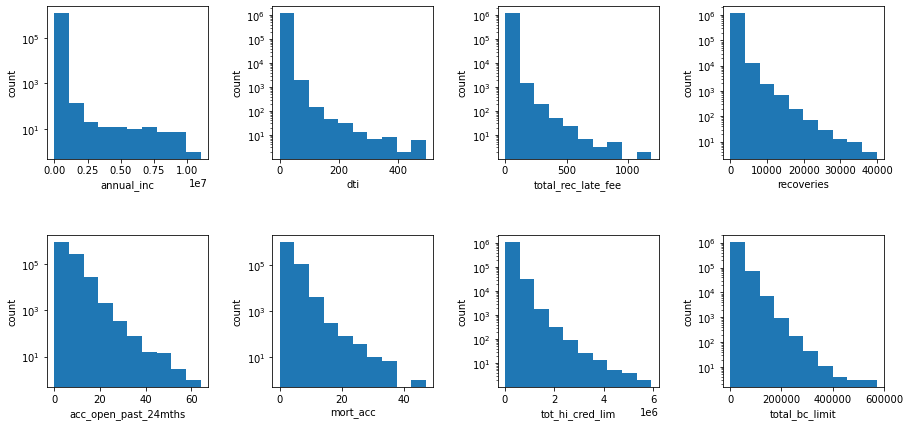

In [124]:
# Run the function to create the plots.
histplots_log(columns_log, ncol=4, figsize = (15, 7))

All numerical columns looks fine. Now let's move to the categorical columns. 

In [203]:
columns_categorical = data_lc.select_dtypes('object').columns
print(columns_categorical)

Index(['term', 'grade', 'emp_length', 'home_ownership', 'purpose',
       'initial_list_status', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')


# 2. Principal Components Analysis (PCA)

PCA is a powerful tool for high dimensional models. First let's split data into training data and testing data. We will study the training data to see the value
distribution in each object column, under the two different loan status. Then we will use the training data 
and create a few simple modelings to predict the y value (loan status) for the testing data. We will compare 
the predicted values with the testing values. The accuracy rate is calculated for each model.

In [128]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [189]:
# select numerical columns for PCA
data_for_pca = data_lc[columns_dtype_float]

In [151]:
data_for_pca.head()

,loan_amnt,int_rate,annual_inc,loan_status,dti,fico_range_high,inq_last_6mths,revol_util,total_rec_late_fee,recoveries,last_pymnt_amnt,last_fico_range_low,acc_open_past_24mths,mort_acc,num_tl_op_past_12m,percent_bc_gt_75,tot_hi_cred_lim,total_bc_limit,earliest_cr_line_year
475975,3000.0,16.14,80000.0,1,11.48,704.0,0.0,99.7,0.0,0.0,2724.01,695.0,2.0,0.0,0.0,100.0,41814.0,2000.0,2010
812756,7000.0,9.67,20000.0,1,14.29,699.0,0.0,38.7,0.0,0.0,2587.59,725.0,3.0,0.0,1.0,40.0,16900.0,5900.0,2009
1053813,14400.0,25.29,77763.0,0,23.39,679.0,2.0,52.5,0.0,959.6,425.12,610.0,6.0,1.0,4.0,100.0,157365.0,2700.0,1998
1153086,23000.0,14.99,55000.0,1,10.80,674.0,0.0,46.5,0.0,0.0,8328.92,695.0,6.0,1.0,3.0,25.0,173488.0,27600.0,2005
666188,22000.0,12.49,93000.0,1,12.12,679.0,0.0,69.3,0.0,0.0,12841.33,685.0,9.0,7.0,2.0,100.0,421922.0,7900.0,1973


In [190]:
# column "loan_status" was included. Need to drop it
data_for_pca = data_for_pca.drop(columns='loan_status')

In [191]:
# will show loan status value in scatter plot
y = data_lc['loan_status']

In [192]:
data_scaled_columns = data_for_pca.columns

In [193]:
# scale the data before PCA
data_scaled = scale(data_for_pca)

In [194]:
data_scaled_df = pd.DataFrame(data_scaled, columns = data_scaled_columns)

In [179]:
data_scaled_df.head()

,loan_amnt,int_rate,annual_inc,dti,fico_range_high,inq_last_6mths,revol_util,total_rec_late_fee,recoveries,last_pymnt_amnt,last_fico_range_low,acc_open_past_24mths,mort_acc,num_tl_op_past_12m,percent_bc_gt_75,tot_hi_cred_lim,total_bc_limit,earliest_cr_line_year
0,-0.887384,1.040208,-0.369759,-1.756927,-0.331635,-0.694984,1.709955,-0.147278,-0.257138,-0.542962,0.188699,-1.166452,-0.835175,-1.184914,1.523611,-0.984300,-0.866676,0.944083
1,-1.172103,0.631871,-0.815674,0.715805,-0.651097,2.518478,-0.385801,-0.147278,-0.257138,-0.177188,-0.262928,0.084993,-0.333843,-0.102759,1.523611,-0.909565,-0.792510,0.399502
2,-0.591275,-1.118147,-0.460336,1.586627,1.265673,-0.694984,-1.425428,-0.147278,-0.257138,-0.738698,0.414513,-0.540730,-0.835175,-0.643836,-0.794803,-0.323087,0.037218,1.080229
3,1.102808,-1.320233,-0.056225,0.616314,1.744865,0.376170,-0.521943,-0.147278,-0.257138,-0.676218,0.075792,-0.227868,-0.835175,-0.102759,-1.259599,-0.472985,0.593460,-0.281225
4,0.707047,-0.647309,0.647484,0.543653,1.265673,0.376170,1.054000,-0.147278,-0.257138,0.463640,0.414513,1.023576,-0.333843,-0.643836,1.058815,-0.129995,2.174115,-1.778823


In [195]:
# check the mean after scaling
data_scaled_df.mean()

loan_amnt                4.206510e-17
int_rate                 3.446500e-14
annual_inc              -5.315033e-15
dti                     -1.229243e-15
fico_range_high         -1.228365e-14
inq_last_6mths           5.211541e-13
revol_util               1.109101e-15
total_rec_late_fee      -5.267792e-15
recoveries               8.912553e-14
last_pymnt_amnt         -2.088441e-15
last_fico_range_low      2.717764e-15
acc_open_past_24mths    -7.617921e-14
mort_acc                 4.683555e-14
num_tl_op_past_12m       4.408474e-13
percent_bc_gt_75         1.034086e-13
tot_hi_cred_lim          4.542755e-17
total_bc_limit           1.487070e-15
earliest_cr_line_year   -5.553360e-15
dtype: float64

In [196]:
# check the standard deviation
data_scaled_df.std()

loan_amnt                1.0
int_rate                 1.0
annual_inc               1.0
dti                      1.0
fico_range_high          1.0
inq_last_6mths           1.0
revol_util               1.0
total_rec_late_fee       1.0
recoveries               1.0
last_pymnt_amnt          1.0
last_fico_range_low      1.0
acc_open_past_24mths     1.0
mort_acc                 1.0
num_tl_op_past_12m       1.0
percent_bc_gt_75         1.0
tot_hi_cred_lim          1.0
total_bc_limit           1.0
earliest_cr_line_year    1.0
dtype: float64

In [197]:
# fit the data
data_pca = PCA().fit(data_scaled_df)

In [183]:
type(data_pca)

sklearn.decomposition._pca.PCA

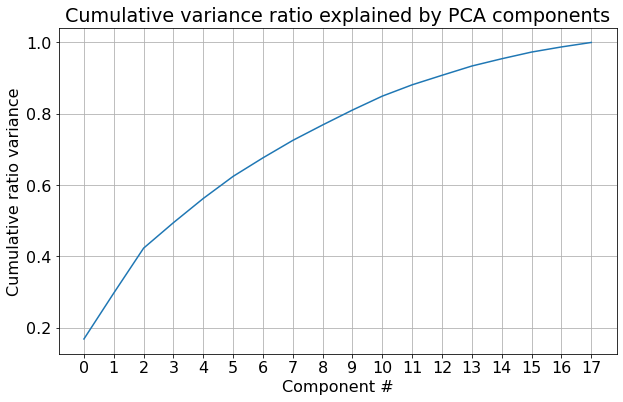

In [224]:
# plot the PCA cumulative variance ratio
plt.rc('font', size=16)
plt.subplots(figsize=(10, 6))
plt.plot(data_pca.explained_variance_ratio_.cumsum())
plt.grid(True)
plt.xticks(range(18))
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components');

From this plot we can see that in order to reach at least 80% explained variance, we should have 9 components or more. 

In [199]:
# transform the data
data_pca_x = data_pca.transform(data_scaled_df)

In [200]:
# create the dataframe with the first two components
pc_1 = data_pca_x[:, 0]
pc_2 = data_pca_x[:, 1]
data_pca_df = pd.DataFrame({'pc_1':pc_1, 'pc_2':pc_2, 'loan status':y})

In [201]:
data_pca_df.shape

(1188428, 3)

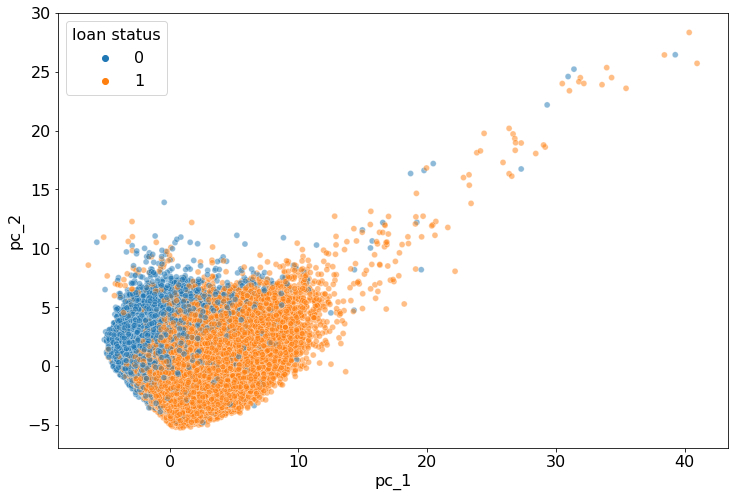

In [225]:
# plot the data point with the first two components values
plt.figure(figsize=(12,8))
sns.scatterplot(x='pc_1', y='pc_2', hue='loan status', data=data_pca_df, alpha=0.5)
plt.show()

With only two pca components, we can see that the two target class have large overlapping to each other. We do see that points of the default loan (loan status = 0, blue points) are more on the top left side, and the points to the fully paid loan (loan status = 1, orange points) are more on the bottom right side.

If we want to make the two classes more seperated, we will need more components. From the plot above we can see that with two principal components, the explained variance is only about 42%. That's very low value. Of course with more components, it is not possible to show them in the plot. 

# 3. Numerical Columns and the Target Variable

Next we want to have a look on the average values of those numerical columns under loan status = 0 and = 1 respectively. Our interest is those columns with big difference in those average values.

In [221]:
for col in columns_numerical:
    df = pd.DataFrame(data_lc.groupby('loan_status')[col].mean())
    min_val = min(df.iloc[0,0], df.iloc[1,0])
    if abs(min_val - 0)<1e-6:
        min_val = max(df.iloc[0,0], df.iloc[1,0])
    df['%'] = 100*abs(df.iloc[0,0] - df.iloc[1,0])/min_val
    print(df)
    print('\n')

                loan_amnt        %
loan_status                       
0            16005.003022  10.6264
1            14467.616296  10.6264


              int_rate         %
loan_status                     
0            15.789869  25.02151
1            12.629722  25.02151


               annual_inc         %
loan_status                        
0            72890.607445  9.500934
1            79815.895934  9.500934


             loan_status      %
loan_status                    
0                      0  100.0
1                      1  100.0


                   dti          %
loan_status                      
0            20.167997  12.829855
1            17.874699  12.829855


             fico_range_high         %
loan_status                           
0                 691.165941  1.475697
1                 701.365457  1.475697


             inq_last_6mths          %
loan_status                           
0                  0.775838  25.898874
1                  0.616239  25.898

We can see that some columns have quite different average value under the two target variable class. Columns with a average difference more than 20% are: 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'last_fico_range_low', 'int_rate', 'inq_last_6mths', 'mort_acc 27', and 'tot_hi_cred_lim'.

Let's then compare this column list with the columns which has the highest correlation with loan status. So let's first calculate the correlation between those numerical columns and column 'loan status'.

In [222]:
col_corr = []
data_lc_corr = []
for item in columns_numerical:
    data_lc_corr.append(abs(data_lc['loan_status'].corr(data_lc[item])))
    col_corr.append(item)
    
df_corr = pd.DataFrame({'column':col_corr, 'correlation':data_lc_corr})
df_corr.sort_values('correlation')

,column,correlation
2,annual_inc,0.038486
18,earliest_cr_line_year,0.050364
7,revol_util,0.058559
15,percent_bc_gt_75,0.066752
6,inq_last_6mths,0.068113
0,loan_amnt,0.069804
17,total_bc_limit,0.070883
13,mort_acc,0.075448
16,tot_hi_cred_lim,0.076413
14,num_tl_op_past_12m,0.088617


The four largest correlated columns are 'last_fico_range_low', 'recoveries', 'last_pymnt_amnt', and 'int_rate'. We will use them in the simple modeling.

It is also interesting to see that those high correlated columns are highly overlapping with the column list of greatest average difference. So when we combine those two lists, we have the confidence that those columns are the most important ones to our model prediction.

# 4. Categorical Columns and the Target Variable

Let's have a look on categorical columns. We want to know that if some specific values in one column appears more often than other values in one of the two target variable class. Let's see the code below.

   loan_status        term  counts   total          %     % diff
0            0   36 months  139512  234933  59.383739 -19.781018
1            0   60 months   95421  234933  40.616261  19.781018
2            1   36 months  754832  953495  79.164757   0.000000
3            1   60 months  198663  953495  20.835243   0.000000


    loan_status grade  counts   total          %     % diff
0             0     A   11721  234933   4.989082 -15.307616
1             0     B   45029  234933  19.166741 -12.428600
2             0     C   75675  234933  32.211311   4.336703
3             0     D   53561  234933  22.798415   9.890219
4             0     E   32048  234933  13.641336   8.347234
5             0     F   12834  234933   5.462834   3.850555
6             0     G    4065  234933   1.730281   1.311505
7             1     A  193528  953495  20.296698   0.000000
8             1     B  301260  953495  31.595341   0.000000
9             1     C  265783  953495  27.874609   0.000000
10           

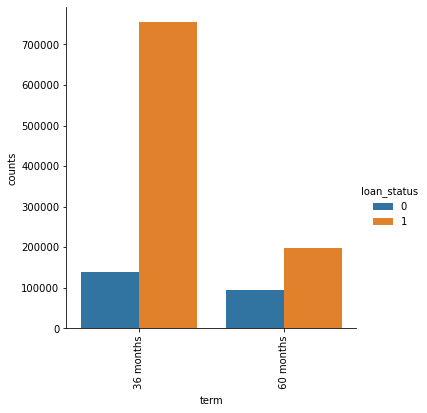

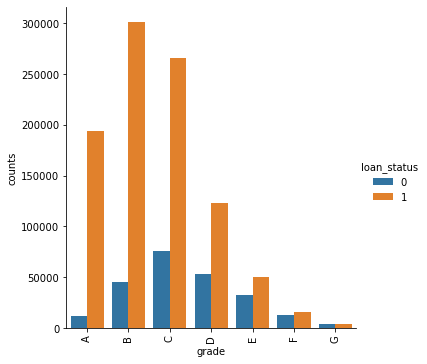

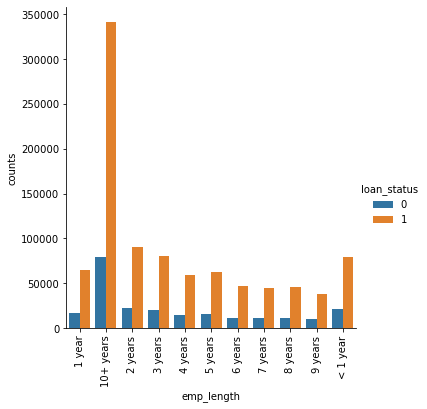

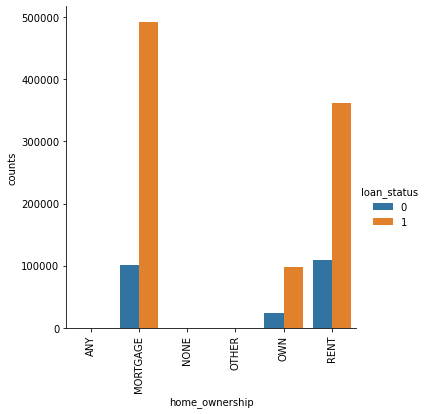

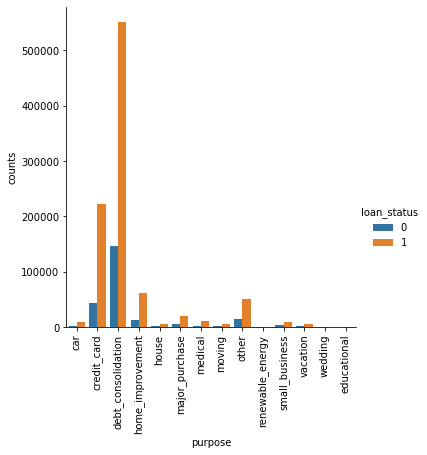

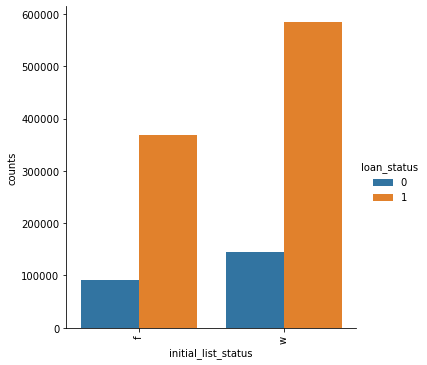

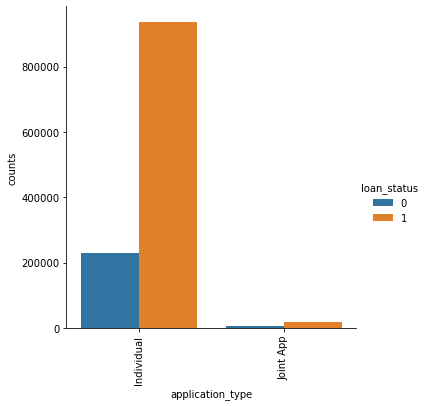

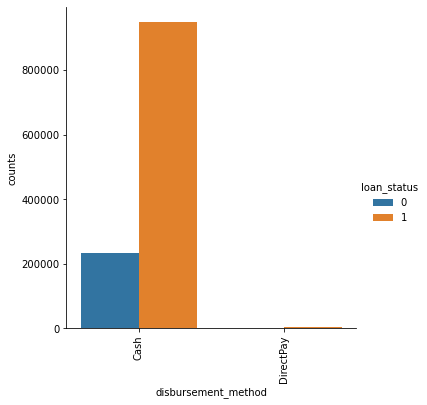

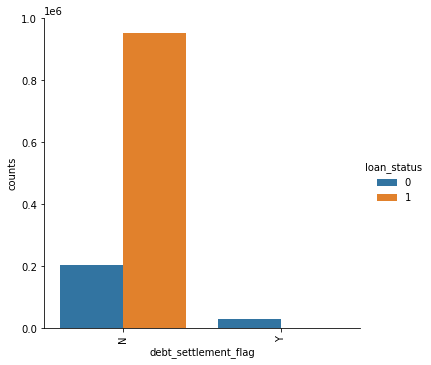

In [220]:
# Here is what we plan to do: We will first group the data by column "loan_status" and 
# count the values for each column. Then, for each column, we will calculate the percentage of 
# numbers of each value in total number of all values, under the condition of loan_status = 0; 
# Next step we will do the same for loan_status = 1. Last step is to calculate the percentage 
# difference for each value between loan_status = 0 and loan_status = 1.

for col in columns_categorical: # run for loop for each categorical column
    col_vs_loanstatus = pd.DataFrame(data_lc.groupby(['loan_status'])[col].value_counts())
    col_vs_loanstatus.rename(columns={col: 'counts'}, inplace=True)
    col_vs_loanstatus.reset_index(inplace=True)
# col_vs_loanstatus is the data frame which contains value counts for this column.

# calculate the total counts of this column when loan_status = 0 and = 1 respectively. 
    col_total = [] # this is the list for the total counts.
    col_val_n = int(len(col_vs_loanstatus)/2) # this is the number of unique values in this column.

# run a for loop to calculate the total counts for each case.
    for i in range(col_val_n): 
        col_total.append(col_vs_loanstatus[col_vs_loanstatus['loan_status']==0]['counts'].sum())
    for i in range(col_val_n, len(col_vs_loanstatus)): 
        col_total.append(col_vs_loanstatus[col_vs_loanstatus['loan_status']==1]['counts'].sum())
    
    col_vs_loanstatus['total'] = col_total #create the column 'total'
    
# get the percentage of the numbers of each value in the total numbers when loan_status =0 and =1.  
    col_vs_loanstatus['%'] = 100 * col_vs_loanstatus['counts'] / col_vs_loanstatus['total']

# sort values for a easy compariton.
    col_vs_loanstatus.sort_values(by=['loan_status', col], inplace=True, ignore_index=True)
  
 # calculate the percentage difference between loan_status = 0 and = 1.
    perc_diff = [] # this is the list for the percentage difference.
    for i in range(col_val_n):
        perc_diff.append(col_vs_loanstatus.loc[i]['%'] - col_vs_loanstatus.loc[i+col_val_n]['%'])

# to make sure the list perc_diff has the same length as col_vs_loanstatus, we need to add enough
# zeros to this list. 
    for i in range(col_val_n):
        perc_diff.append(0.0)
        
# some columns have specific values only when loan_status = o or = 1, but not in both. So we need 
# to add extra zero to the list. 
    for i in range(len(col_vs_loanstatus)-len(perc_diff)):
        perc_diff.append(0.0)
    
    
    col_vs_loanstatus['% diff'] = perc_diff
    sns.catplot(x=col, y='counts', data=col_vs_loanstatus, hue='loan_status', kind='bar')
    plt.xticks(rotation=90)
    print(col_vs_loanstatus)
    print('\n')
                          

From the result above we do see that some values appears more often in one specific loan status class, which indicates that this column does contribute to the loan status prediction. For columns with a percentage difference greater than 10%, they are 'term', 'grade', and 'debt_settlement_flag'. We will use them as exploratory variables in our further modeling.

# 5. Conclusions

1. In this study we have plot the value distributions of each numerical columns.
2. We have applied PCA to our data and created scatter plot for all the data points under the two target variable classes, based on the values of two principal components. We did see large overlapping between the two classes, which indicate two components are not enough for our model; 
3. For numerical features, we calculated the average difference under the two classes, and we also get the correlation between those features with the target variable. We saw large overlapping between the columns with large average difference and columns with high correlation. This overlapping gives us confidence that those columns are the most important columns to our model. 
4. For categorical features, our interest is those features who have quite different value counts in the two classes. We see three columns with large different counts. These columns also play important roles in our model prediction.